# LKJ Prior

In [1]:
# We illustrate LKJ prior as discussed in fig 14.3 of
# [Statistical Rethinking ed 2](https://xcelab.net/rm/statistical-rethinking/).
# The numpyro code is from [Du Phan's site]
#https://fehiepsi.github.io/rethinking-numpyro/14-adventures-in-covariance.html

try:
    import numpyro.distributions as dist
except ModuleNotFoundError:
    %pip install -qq numpyro
    import numpyro.distributions as dist
try:
    from probml_utils import latexify,is_latexify_enabled,savefig
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify,is_latexify_enabled,savefig

import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import seaborn as sns
np.set_printoptions(precision=3)


     |████████████████████████████████| 283 kB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 272 kB 11.4 MB/s 
     |████████████████████████████████| 88 kB 9.0 MB/s 
     |████████████████████████████████| 72 kB 691 kB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 


In [2]:
latexify(width_scale_factor=3, fig_height=1.5)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


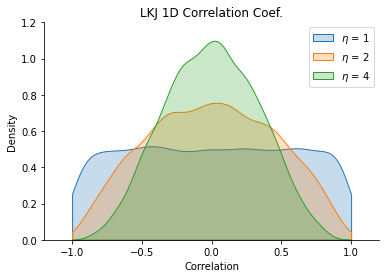

In [3]:
def plot(eta_list,savename,random_seed):
  font_size = 6 if is_latexify_enabled() else None
  rng_key = jax.random.PRNGKey(random_seed)
  rng_key, rng_key_ = jax.random.split(rng_key)
  fig, ax = plt.subplots()
  for i, eta in enumerate(eta_list):
    R = dist.LKJ(dimension=2, concentration=eta).sample(jax.random.PRNGKey(0), (int(1e4),))
    sns.kdeplot(R[:, 0, 1], label=f"$\eta$ = {eta}",clip=[-1,1],shade=True)
  plt.legend(loc='upper right',fontsize=font_size)
  ax.set_xlabel('Correlation')
  ax.set_ylabel('Density')
  ax.set_ylim(0, 1.2)
  ax.set_xlim(-1.2, 1.2)
  plt.title('LKJ 1D Correlation Coef.')
  sns.despine()
  if len(savename) > 0:
        savefig(savename)
  plt.show()

plot([1,2,4],'',0)

In [4]:
from ipywidgets import interact
@interact(eta=(1,4),random_seed=(1,20))
def generate_random(eta=2,random_seed=10):
  plot([eta],'',random_seed)

interactive(children=(IntSlider(value=2, description='eta', max=4, min=1), IntSlider(value=10, description='ra…